In [19]:
import os
import pydicom
import matplotlib.pyplot as plt

In [20]:
dicom_dir = 'DICOM'

def get_slice_location(dicom_file):
    try:
        return float(dicom_file.SliceLocation)
    except AttributeError:
        return None

ct_files = []
pet_files = []

for filename in os.listdir(dicom_dir):
    if filename.lower().endswith(".dcm"):
        file_path = os.path.join(dicom_dir, filename)
        dicom_data = pydicom.dcmread(file_path)
        
        if "CT" in filename:
            ct_files.append(dicom_data)
        elif "PET" in filename:
            pet_files.append(dicom_data)

ct_files = sorted([f for f in ct_files if get_slice_location(f) is not None], key=get_slice_location, reverse=True)
pet_files = sorted([f for f in pet_files if get_slice_location(f) is not None], key=get_slice_location, reverse=True)

print(f"Length of CT series: {len(ct_files)}")
print(f"Length of PET series: {len(pet_files)}")

Length of CT series: 247
Length of PET series: 247


In [21]:
if len(ct_files) > 0:
    ct_file = ct_files[0]

    kvp = getattr(ct_file, 'KVP', 'N/A')
    slope = getattr(ct_file, 'RescaleSlope', 'N/A')
    intercept = getattr(ct_file, 'RescaleIntercept', 'N/A')
    manufacturer = getattr(ct_file, 'Manufacturer', 'N/A')
    patient_sex = getattr(ct_file, 'PatientSex', 'N/A')
    patient_weight = getattr(ct_file, 'PatientWeight', 'N/A')

    print("CT Information:")
    print(f"- KVP: {kvp}")
    print(f"- Rescale Slope: {slope}")
    print(f"- Rescale Intercept: {intercept}")
    print(f"- Manufacturer: {manufacturer}")
    print(f"- Patient Sex: {patient_sex}")
    print(f"- Patient Weight: {patient_weight}")

CT Information:
- KVP: 120
- Rescale Slope: 1
- Rescale Intercept: -1024
- Manufacturer: GE MEDICAL SYSTEMS
- Patient Sex: F
- Patient Weight: 59.0


CT image's shape: (512, 512)
PET image's shape: (256, 256)


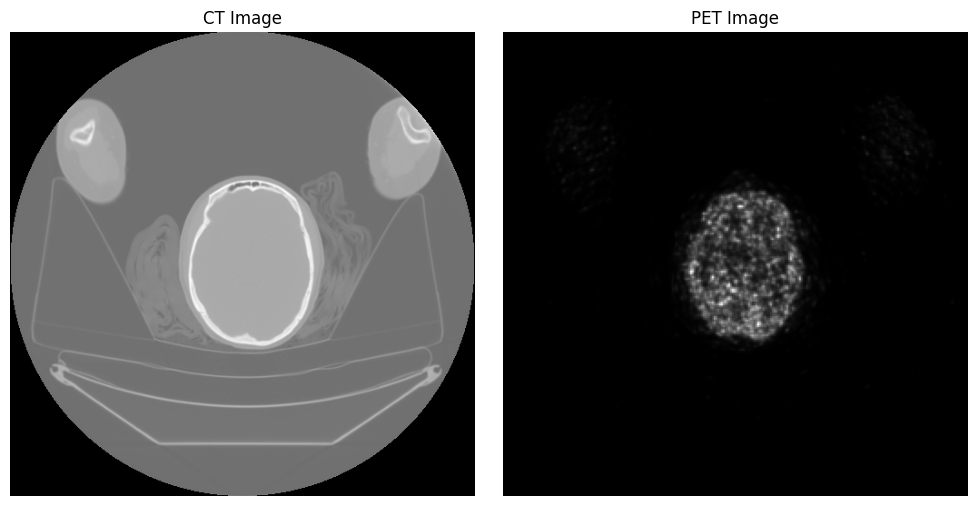

In [22]:
if len(ct_files) > 0 and len(ct_files) > 0:
    ct_file = ct_files[0]
    pet_file = pet_files[0]
    
    ct_image = ct_file.pixel_array
    pet_image = pet_file.pixel_array
    
    print(f"2D CT image's shape: {ct_image.shape}")
    print(f"2D PET image's shape: {pet_image.shape}")
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].imshow(ct_image, cmap='gray')
    axs[0].set_title("CT Image")
    axs[0].axis('off') 

    axs[1].imshow(pet_image, cmap='gray')
    axs[1].set_title("PET Image")
    axs[1].axis('off') 

    plt.tight_layout()
    plt.show()